In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv('carmileage.csv')
#X = scipy.stats.boxcox(df['HP'].to_list())[0]
df.tail()

,MAKEMODEL,VOL,HP,MPG,SP,WT
77,Mercedes500SL,50,322,18.1,165,45.0
78,Mercedes560SEL,115,238,17.2,140,45.0
79,JaguarXJSConvert,50,263,17.0,147,45.0
80,BMW750IL,119,295,16.7,157,45.0
81,Rolls-RoyceVarious,107,236,13.2,130,55.0


In [3]:
Y = np.sqrt(df['MPG'])

vars = ['HP','VOL','SP','WT']
X = df[vars]
results = sm.OLS(Y, sm.add_constant(X)).fit(cov_type = "HC1")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     202.8
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           4.69e-40
Time:                        10:58:05   Log-Likelihood:                -7.6909
No. Observations:                  82   AIC:                             25.38
Df Residuals:                      77   BIC:                             37.42
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9256      2.411      6.604      0.0

In [33]:
# Using statsmodels
aics = []
for var in ['HP','VOL','SP','WT']:
    vars = ['HP','VOL','SP','WT']
    vars.remove(var)
    X = df[vars]
    results = sm.OLS(Y, sm.add_constant(X)).fit(cov_type = "HC1")
    aic = results.aic
    aics.append(aic)

pd.DataFrame(aics,['HP','VOL','SP','WT']).T

,HP,VOL,SP,WT
0,35.465529,23.849442,39.48027,76.034408


Remove `VOL`

In [35]:
# Using statsmodels
aics = []
for var in ['HP','SP','WT']:
    vars = ['HP','SP','WT']
    vars.remove(var)
    X = df[vars]
    results = sm.OLS(Y, sm.add_constant(X)).fit(cov_type = "HC1")
    aic = results.aic
    aics.append(aic)

pd.DataFrame(aics,['HP','SP','WT']).T

,HP,SP,WT
0,35.556208,38.927597,85.353779


No further reduction in AIC. Hence the final model will have three variables - HP, SP, WT

In [55]:
X = df[['HP','SP','WT']]
results = sm.OLS(Y, sm.add_constant(X)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     239.8
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           2.87e-39
Time:                        12:17:27   Log-Likelihood:                -7.9247
No. Observations:                  82   AIC:                             23.85
Df Residuals:                      78   BIC:                             33.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0485      1.751      9.167      0.0

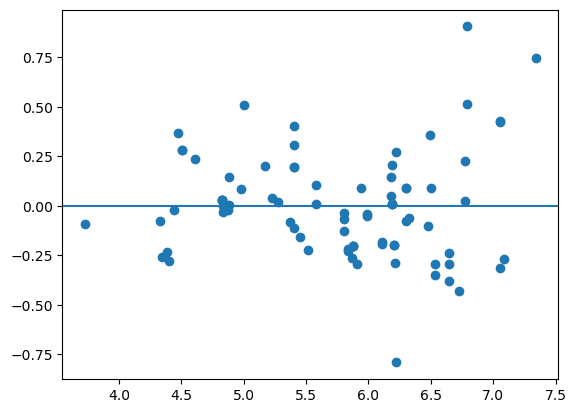

In [63]:
predictions = results.get_prediction(sm.add_constant(X)).summary_frame(alpha=0.05)  # alpha = significance level for confidence interval
residuals = np.array(Y).flatten() - np.array(predictions['mean']).flatten()
plt.scatter(predictions['mean'],residuals)
plt.axhline(y=0)
plt.show()

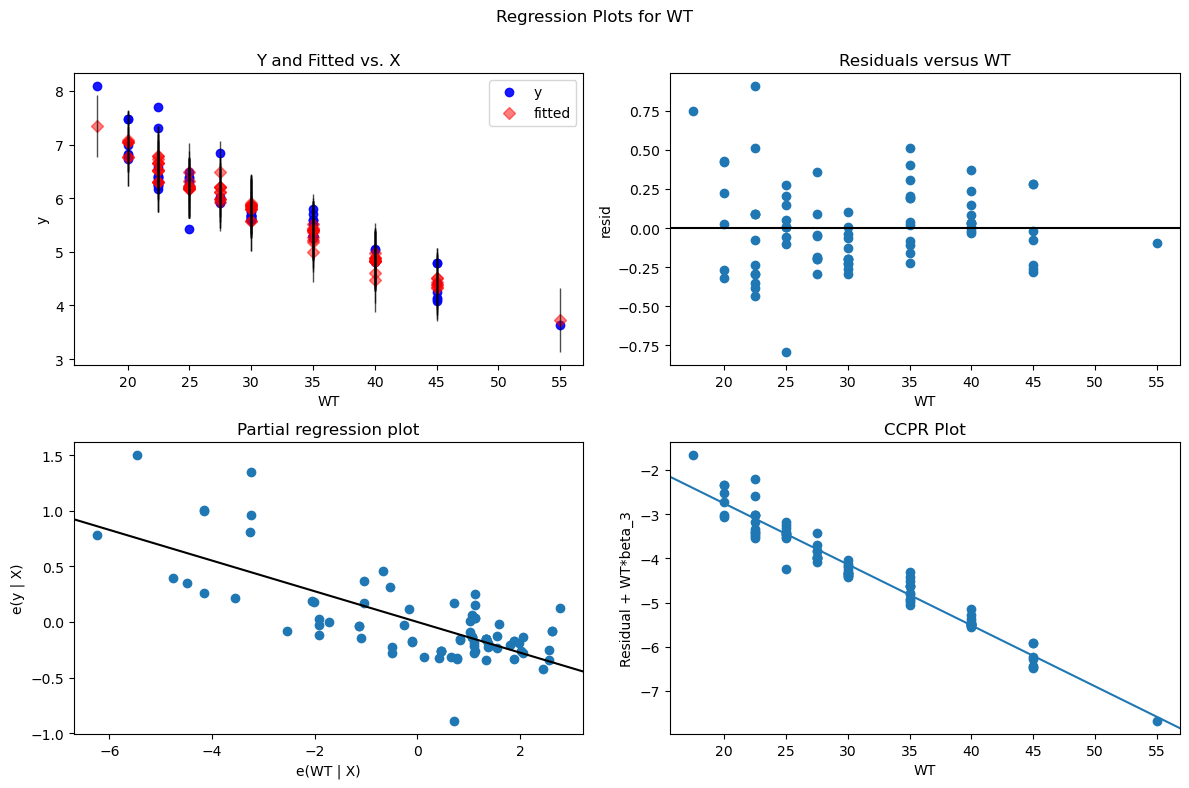

In [54]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(results, 'WT', fig=fig)

In [37]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

In [41]:
kfold_validation = KFold(3)

In [44]:
model = LinearRegression()
X = np.array(X)
Y = np.array(Y).reshape(-1,1)
results = cross_val_score(model, sm.add_constant(X), Y, scoring='neg_mean_squared_error', cv=kfold_validation)
results

array([-0.23658248, -0.08321323, -1.05493942])

In [45]:
np.mean(results)

-0.4582450419797726

In [102]:
Y =df['MPG']
#vars = ['HP','VOL','SP','WT']

vars = ['HP','WT']
X = df[vars]
results = sm.OLS(Y, sm.add_constant(X)).fit(cov_type = "HC1")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     133.7
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           4.36e-26
Time:                        17:01:04   Log-Likelihood:                -233.58
No. Observations:                  82   AIC:                             473.2
Df Residuals:                      79   BIC:                             480.4
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.8550      2.700     24.760      0.0

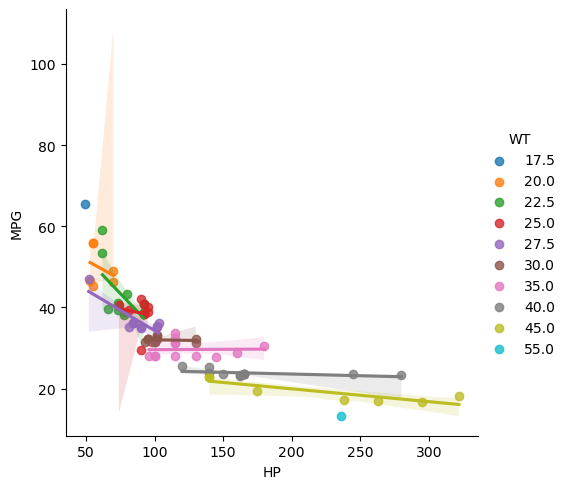

In [108]:
import seaborn as sns
sns.lmplot(x='HP', y='MPG', data=df, hue='WT')

In [103]:
slopes = []
hps = []
for wt in df['WT'].unique():
    vars = ['HP']
    X = df[df['WT'] == wt][vars]
    Y =df[df['WT'] == wt]['MPG']
    
    if df[df['WT'] == wt].shape[0] == 1:
        continue
    results = sm.OLS(Y, sm.add_constant(X)).fit()

    if results.params.shape[0] ==1:
        continue
    slopes.append(results.params['HP'])


In [119]:
df.VOL.nunique()

34

In [118]:
df[df['WT'] == 22.5]

,MAKEMODEL,VOL,HP,MPG,SP,WT
7,HondaCivicCRXHF,50,62,59.2,98,22.5
8,HondaCivicCRXHF,50,62,53.3,98,22.5
9,DaihatsuCharade,94,80,43.4,107,22.5
10,SubaruJusty,89,73,41.1,103,22.5
11,HondaCivicCRX,50,92,40.9,113,22.5
12,HondaCivic,99,92,40.9,113,22.5
13,SubaruJusty,89,73,40.4,103,22.5
14,SubaruJusty,89,66,39.6,100,22.5
15,SubaruJusty4wd,89,73,39.3,103,22.5
16,ToyotaTercel,91,78,38.9,106,22.5


In [113]:
np.array(slopes).sum()/40

-0.0854993317576754

In [114]:
slopes

[-0.1865979381443299,
 -0.3538432049070344,
 -0.07053504144687339,
 -0.20055549383401822,
 -0.0052426101505856915,
 0.0016161662605178595,
 -0.008338889400497235,
 -0.03149630595393309]

In [112]:
df['WT'].unique()

array([17.5, 20. , 22.5, 25. , 27.5, 30. , 35. , 40. , 45. , 55. ])

In [30]:
X

,HP
63,140


In [31]:
Y

63    25.3
Name: MPG, dtype: float64